### Multi-armed bandits with soft-max action selection (programming)

This exercise is the same as Exercise mab/eps, but now the actions 𝐴𝑡 ∈ 𝒜 = {1, … , |𝒜|} are selected with probability

ℙ[𝑎] = exp(𝑄𝑡(𝑎)/𝜏 )∑|𝒜|𝑖=1 exp(𝑄𝑡(𝑖)/𝜏 ),

where the parameter 𝜏 is called the temperature. This probability
distribution is called the softmax or Boltzmann distribution.
What are the effects of low and high temperatures, i.e., how does the
temperature influence the probability distribution all else being equal?
Which value of 𝜏 yields the largest average reward?

high temperature => smoothed out probs

low temperature => sharper prob peaks for the best action

In [1]:
using Statistics
using Plots
using Distributions

In [13]:
function softmax(x)
    return exp.(x)/sum(exp.(x))
end

function mab(q, τ; epochs=1000)
    num_bandits = length(q)
    Q = zeros(num_bandits)
    N = zeros(num_bandits)
    rewards = []
    actions = []
    
    for t in 1:epochs
        P = softmax(Q/τ)
        a_dist = Categorical(P)
        a = rand(a_dist) # sample from categorical dist with P probabilities
        
        R = q[a] .+ randn()
        push!(rewards, R)
        push!(actions, a)
        N[a] += 1
        Q[a] += (R - Q[a])/N[a]
    end
    
    return rewards, actions, Q
end

mab (generic function with 1 method)

In [14]:
reward_dict = Dict()

N = 10
num_runs = 1000

for τ in [1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4]
    mean_rewards = []
    for run in 1:num_runs
        q = randn(N)
        push!(mean_rewards, mean(mab(q, τ, epochs=1000)[1]))
    end
    
    reward_dict[τ] = mean_rewards 
end

In [15]:
reward_std = Dict(τ => std(reward_dict[τ]) for τ in keys(reward_dict))
reward_mean = Dict(τ => mean(reward_dict[τ]) for τ in keys(reward_dict))

Dict{Float64,Float64} with 8 entries:
  0.125   => 1.3247
  4.0     => 0.220039
  0.0625  => 1.17496
  0.5     => 1.24139
  2.0     => 0.440886
  0.03125 => 1.10501
  0.25    => 1.41096
  1.0     => 0.798989

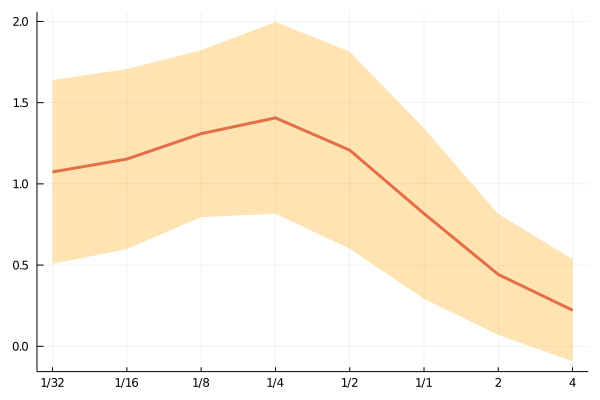

In [5]:
x = [1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4]
y_mean = [reward_mean[k] for k in x]
y_std = [reward_std[k] for k in x]

x_tics = append!(["1/$(num)" for num in [32, 16, 8, 4, 2, 1]], ["$(num)" for num in [2, 4]])
plot(x, y_mean, xtick=(x, x_tics), xaxis=:log, legend=false)
plot!(x, y_mean, ribbon=y_std, fc=:orange, fa=0.3, linewidth=3)

In [6]:
action_dict = Dict()

N = 10
num_runs = 1000
epochs = 1000

for τ in [1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4]
    correct_action_count = []
    for run in 1:num_runs
        q = randn(N)
        optimal_action = findmax(q)[2]
        
        actions = mab(q, τ, epochs=1000)[2]
        correct_actions = length(filter(x -> x==optimal_action, actions))/epochs
        push!(correct_action_count, correct_actions)
    end
    
    action_dict[τ] = correct_action_count 
end

In [7]:
action_count_std = Dict(τ => std(action_dict[τ]) for τ in keys(action_dict))
action_count_means = Dict(τ => mean(action_dict[τ]) for τ in keys(action_dict))

Dict{Float64,Float64} with 8 entries:
  0.125   => 0.559836
  4.0     => 0.143081
  0.0625  => 0.453081
  0.5     => 0.53019
  2.0     => 0.19887
  0.03125 => 0.399186
  0.25    => 0.671361
  1.0     => 0.319829

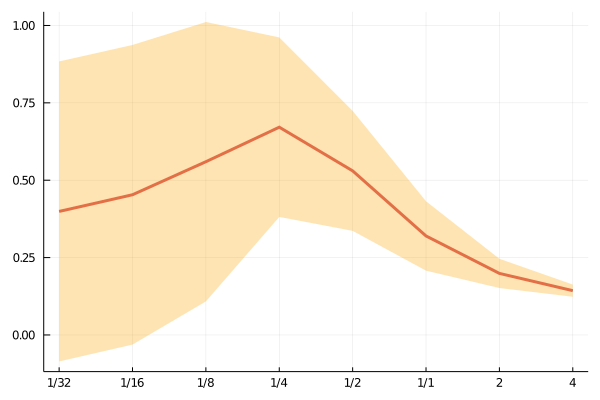

In [8]:
x = [1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4]
y_mean = [action_count_means[k] for k in x]
y_std = [action_count_std[k] for k in x]

x_tics = append!(["1/$(num)" for num in [32, 16, 8, 4, 2, 1]], ["$(num)" for num in [2, 4]])
plot(x, y_mean, xtick=(x, x_tics), xaxis=:log, legend=false)
plot!(x, y_mean, ribbon=y_std, fc=:orange, fa=0.3, linewidth=3)